In [44]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
import numpy as np
import pandas as pd
import anndata as adata
from matplotlib import pyplot as plt

import seaborn as sns

import os

In [25]:
genes_df = pd.read_csv("./data/atac_data/genes_atac.tsv", sep='\t')
atac_df = pd.read_csv("./data/atac_data/matrix_atac.tsv", sep='\t')
barcodes_df = pd.read_csv("./data/atac_data/barcodes_atac.tsv", sep='\t')

In [96]:
atac_df.head(100)
df = atac_df.iloc[:, 1:]
atac_df.describe()
#df.head(100)

,AAACAGCCAATCCCTT-1,AAACAGCCAATGCGCT-1,AAACAGCCACCAACCG-1,AAACAGCCAGGATAAC-1,AAACAGCCAGTAGGTG-1,AAACAGCCAGTTTACG-1,AAACAGCCATCCAGGT-1,AAACATGCAAGGTCCT-1,AAACATGCACCGGCTA-1,AAACATGCACTTGTTC-1,...,TTTGTGTTCGATAACC-1,TTTGTGTTCGGGACCT-1,TTTGTGTTCGTCAAGT-1,TTTGTGTTCTCCATAT-1,TTTGTTGGTCAGGAAG-1,TTTGTTGGTGACATGC-1,TTTGTTGGTGTTAAAC-1,TTTGTTGGTTAGGATT-1,TTTGTTGGTTGGTTAG-1,TTTGTTGGTTTGCAGA-1
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.040677,0.023229,-0.028101,-0.045247,0.065895,-0.015496,0.029349,0.029242,0.025068,-0.022293,...,0.046677,0.098534,-0.012492,0.018317,-0.023013,0.031770,-0.002836,-0.040882,-0.027476,-0.034565
std,1.168188,0.989303,1.116855,0.998872,0.888137,0.846818,1.227851,0.895787,1.003005,0.858441,...,1.217077,1.183442,0.965605,0.892833,1.447189,1.209750,0.906927,0.874098,0.772851,0.752667
min,-1.430503,-1.166283,-1.717097,-1.900053,-1.430503,-1.245283,-1.329513,-1.184388,-1.430503,-1.430503,...,-1.717097,-1.090351,-1.430503,-1.326007,-1.900053,-1.326007,-1.777858,-1.378908,-1.430503,-1.777858
25%,-0.196596,-0.206967,-0.219879,-0.219879,-0.183042,-0.202839,-0.206967,-0.196596,-0.208785,-0.210391,...,-0.207726,-0.187017,-0.209370,-0.188578,-0.229938,-0.210391,-0.208394,-0.216231,-0.207674,-0.204520
50%,-0.120053,-0.121992,-0.128346,-0.128092,-0.113245,-0.122383,-0.121992,-0.119287,-0.122060,-0.124080,...,-0.122060,-0.116516,-0.123361,-0.117370,-0.130422,-0.124706,-0.122644,-0.126753,-0.122968,-0.122644
75%,-0.079153,-0.080662,-0.084266,-0.084173,-0.075004,-0.080624,-0.080353,-0.079029,-0.080353,-0.081689,...,-0.080184,-0.076408,-0.081154,-0.078023,-0.086804,-0.081734,-0.080716,-0.083660,-0.081018,-0.080662
max,19.045065,13.548858,18.006573,13.631063,8.882424,9.870586,22.702854,9.794975,9.977976,10.197498,...,17.953106,17.119260,15.786750,12.095119,25.502327,16.677265,10.906567,14.024525,8.599302,10.508261


In [74]:

#vals = nparratac_df.loc[1]
#sns.violinplot(data=df[0:1])

#plt.scatter(x=atac_df.loc[1], y=atac_df.loc[2])

<h1>UMAP and PCA</h1>
https://umap-learn.readthedocs.io/en/latest/basic_usage.html

In [86]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import umap.plot


In [83]:
#sklearn.decomposition.KernelPCA(atac_df)

#pca = PCA(n_components=1)
#pca.fit(df)
#pca_data = pca.transform(df)


In [89]:
reducer = umap.UMAP()

umap_data = df.values
scaled_data = StandardScaler().fit_transform(umap_data)

embedding = reducer.fit_transform(scaled_data)
embedding.shape

(1000, 2)

Text(0.5, 1.0, 'UMAP projection of scATAC data')

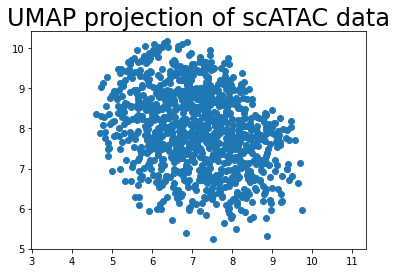

In [99]:
plt.scatter(embedding[:, 0],embedding[:, 1])
    #c=[sns.color_palette()[x] for x in df.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of scATAC data', fontsize=24)


<AxesSubplot:>

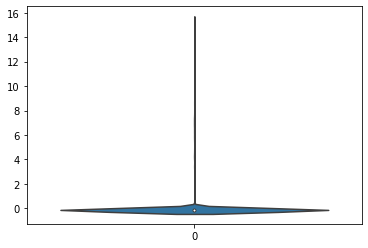

In [111]:
df.loc[56]
sns.violinplot(data=df.loc[56], jitter=0.4)

In [79]:
df.head(100)
#mapper = umap.UMAP().fit(df.values)
#umap.plot.points(mapper)

,AAACAGCCAATCCCTT-1,AAACAGCCAATGCGCT-1,AAACAGCCACCAACCG-1,AAACAGCCAGGATAAC-1,AAACAGCCAGTAGGTG-1,AAACAGCCAGTTTACG-1,AAACAGCCATCCAGGT-1,AAACATGCAAGGTCCT-1,AAACATGCACCGGCTA-1,AAACATGCACTTGTTC-1,...,TTTGTGTTCGATAACC-1,TTTGTGTTCGGGACCT-1,TTTGTGTTCGTCAAGT-1,TTTGTGTTCTCCATAT-1,TTTGTTGGTCAGGAAG-1,TTTGTTGGTGACATGC-1,TTTGTTGGTGTTAAAC-1,TTTGTTGGTTAGGATT-1,TTTGTTGGTTGGTTAG-1,TTTGTTGGTTTGCAGA-1
0,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,...,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744
1,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,...,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420
2,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,...,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548
3,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,...,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238
4,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,...,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.349844,0.744676,-0.876536,-0.876536,0.563343,1.348053,1.230084,-0.876536,-0.876536,-0.876536,...,0.402362,0.384516,-0.876536,0.684424,-0.876536,-0.876536,-0.876536,1.309321,0.719594,1.211556
96,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,...,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289
97,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,...,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057
98,-0.667272,-0.667272,2.404169,-0.667272,-0.667272,-0.667272,-0.667272,-0.667272,-0.667272,-0.667272,...,-0.667272,0.799157,-0.667272,-0.667272,-0.667272,-0.667272,2.143346,-0.667272,-0.667272,-0.667272
